In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import hvplot.pandas
from scipy.stats import linregress

In [8]:
happy_df = pd.read_csv("output_data/WHR2023.csv")
happy_df.head()

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


In [9]:
happy_df = happy_df.dropna()

In [10]:
happy_gdp = happy_df[["Country name","Logged GDP per capita", "Healthy life expectancy"]]
happy_gdp = happy_gdp.set_index("Country name")
happy_gdp.head()

,Logged GDP per capita,Healthy life expectancy
Country name,,
Finland,10.792,71.150
Denmark,10.962,71.250
Iceland,10.896,72.050
Israel,10.639,72.697
Netherlands,10.942,71.550


In [11]:
def lin_regress(x_axis, y_axis, y_label, eq_loc, point_color, line_color):
    plt.scatter(x_axis, y_axis, color=point_color, edgecolors="black")
    plt.suptitle(f"Country GDP per capita vs. {y_label} (2023)", weight="bold")
    plt.xlabel("Country GDP per capita")
    plt.ylabel(y_label)
    plt.grid(linestyle="--")
    
    (slope, intercept ,rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    fit = slope * x_axis + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.annotate(line_eq, eq_loc, fontsize=10, color="red")
    plt.title(f"The r-value is: {rvalue}", loc="right")
    plt.plot(x_axis, fit, color=line_color)
    

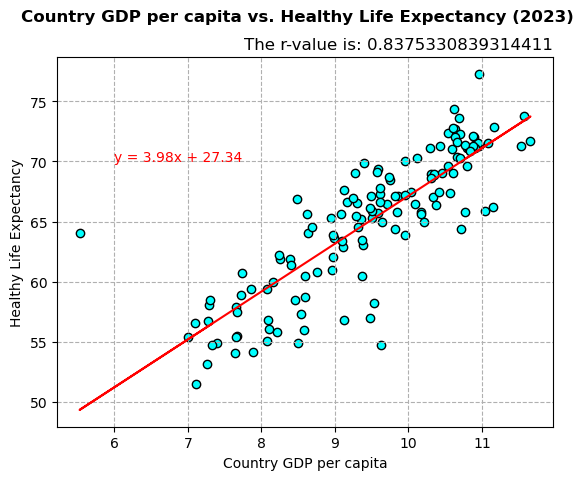

In [12]:
lin_regress(happy_gdp["Logged GDP per capita"], happy_gdp["Healthy life expectancy"], "Healthy Life Expectancy", (6, 70), "cyan", "red")

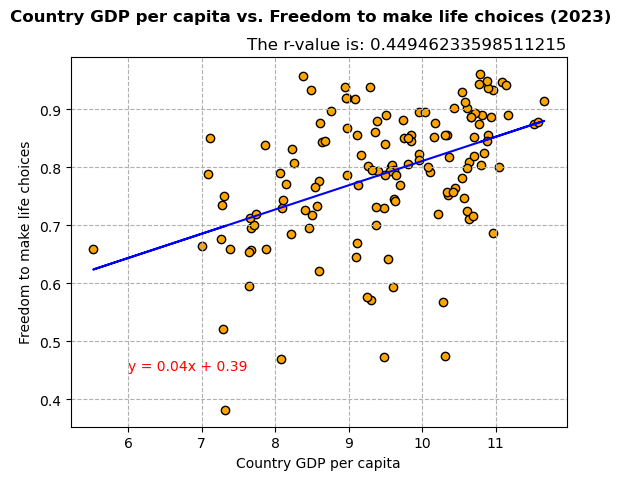

In [13]:
lin_regress(happy_df["Logged GDP per capita"], happy_df["Freedom to make life choices"], "Freedom to make life choices", (6, 0.45), "orange", "blue")

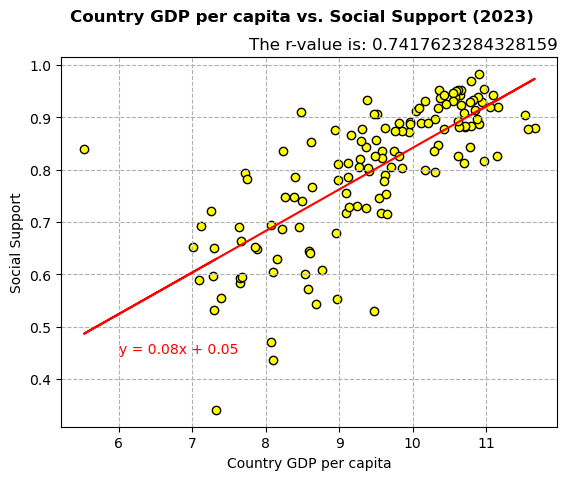

In [14]:
lin_regress(happy_df["Logged GDP per capita"], happy_df["Social support"], "Social Support", (6, 0.45), "yellow", "red")